# Monte Carlo Integration

This notebook demonstrates using Monte Carlo estimates to evaluate integrals numerically.

## Author
James Bott

## Calculating the Integral of $x^2$

This first example calculates the definite integral of $x^2$ in the range [0, 100]. It is trivial to find the integral of $x^2$ analytically and this allows us to easily verify the result of the Monte-Carlo numerical method. 



Iterations: 1000000
Estimated error: 297.9520091967079
Calculated integral: 333597.1161768156
Analytical solution: 333333.3333333333
Percent error is: 0.0791 %


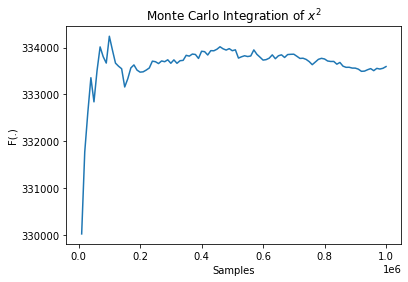

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Function to integrate
def f(x):
    return x**2

# Definite integral of the function for comparison
def F(domain):
    return (domain[1]**3)/3 - (domain[0]**3)/3

# Domain over which to evaluate integral
domain = (0, 100)

# Define an empty data frame
# Create n samples drawn from a uniform distribution 
n = 1000000
df = pd.DataFrame(columns = ("X",), data = np.random.uniform(domain[0], domain[1], n))

# Calculate function values using numpy vectorize to increase speed 
df['Y'] = np.vectorize(f)(df["X"])

# Empty list for errors
iterations = []
values = []
errors = []

# For increasing number of samples
step = 10000
for i in range(step, n+step, step):

    # Find the mean value of the function
    meanValue = df[0:i]['Y'].mean()
    
    # Find the variance of the function
    varianceValue = df[0:i]['Y'].var()

    # Find the error
    error = np.sqrt(varianceValue / i) * (domain[1] - domain[0])
    
    # Find the integral calculated over the domain
    calculatedIntegral = meanValue * (domain[1] - domain[0])

    # Save values
    values.append(calculatedIntegral)
    errors.append(error)
    iterations.append(i)
    
# Print the results 
print(f"Iterations: {iterations[-1]}")
print(f"Estimated error: {errors[-1]}")
print(f"Calculated integral: {values[-1]}")
print(f"Analytical solution: {F(domain)}")
print(f"Percent error is: {(100*(values[-1]-F(domain))/F(domain)):.4f} %")    
    
# Plot the integral as a function of points
plt.plot(iterations, values)
plt.xlabel("Samples")
plt.ylabel("F(.)")
plt.title("Monte Carlo Integration of $x^2$")
plt.show()

## Calculating the Integral of $\mathrm{e}^{-\sin(x^2)}$

We can calculate a more complex integral using the same Monte-Carlo method.

Iterations: 1000000
Estimated error: 0.0004820485801767557
Calculated integral: 0.7254877684310027


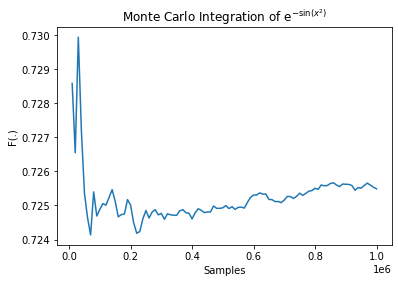

In [2]:
# Function to integrate
def f(x):
    return np.exp(-np.sin(x**2))

# Domain over which to evaluate integral
domain = (1, 2)

# Create n samples drawn from a uniform distribution 
n = 1000000
df = pd.DataFrame(columns = ("X",), data = np.random.uniform(domain[0], domain[1], n))

# Calculate function values using numpy vectorize to increase speed 
df['Y'] = np.vectorize(f)(df["X"])

# Empty list for errors
iterations = []
values = []
errors = []

# For increasing number of samples
step = 10000
for i in range(step, n+step, step):

    # Find the mean value of the function
    meanValue = df[0:i]['Y'].mean()
    
    # Find the variance of the function
    varianceValue = df[0:i]['Y'].var()

    # Find the error
    error = np.sqrt(varianceValue / i) * (domain[1] - domain[0])
    
    # Find the integral calculated over the domain
    calculatedIntegral = meanValue * (domain[1] - domain[0])

    # Save calues
    errors.append(error)
    values.append(calculatedIntegral)
    iterations.append(i)
    
# Print the results 
print(f"Iterations: {iterations[-1]}")
print(f"Estimated error: {errors[-1]}")
print(f"Calculated integral: {values[-1]}")
    
# Plot the integral as a function of points
plt.plot(iterations, values)
plt.xlabel("Samples")
plt.ylabel("F(.)")
plt.title("Monte Carlo Integration of $\mathrm{e}^{-\sin(x^2)}$")
plt.show()

## Calculating a Double Integral

In this example we integrate the function $f(x,y) = (x^2 + y^2)^2$ over the domain $D$ which is the unit circle:

$$
I = \int\int_{D} (x^2+y^2)^2 \, dx \, dy
$$

The variable $V$ denotes the volume of $D$ we wish to integrate, which in this case is the area of the unit circle having a value of $\pi$.

The estimate of I is therefore:

$$
I \approx V\frac{1}{N}\sum_{i=0}^{N}f(X_i)
$$

Where $X_i$ is the $i$*th* sample point. 

Iterations: 785209
Estimated error: 0.0010561087091310053
Calculated integral: 1.0479571066151838
Analytical solution: 1.0471975511965976
Percent error is: 0.0081 %


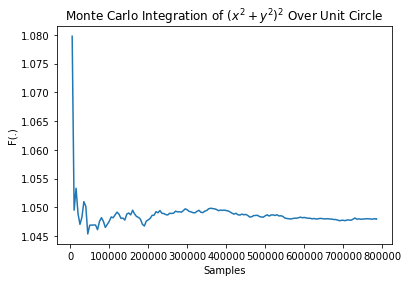

In [3]:
# The function to integrate
def f(x, y):
    return (x**2 + y**2)**2

# The volume over which we will integrate is the area of the unit circle
V = np.pi

# Create n samples drawn from a uniform distribution 
n = 1000000
df = pd.DataFrame(
    columns = ("X", "Y"), 
    data = np.random.uniform((-1,-1), (1,1), (n, 2)))

# Select points in the circle
df = df[(df["X"]**2 + df["Y"]**2) <= 1]

# User numpy vectorize rather than pandas apply to increase speed 
df["Z"] = np.vectorize(f)(df["X"], df["Y"])

# Calculate the integral for an increasing number of points
iterations = []
values = []
errors = []
step = 5000
for i in range(step, n+step, step):

    # Calculate the integral over the domain
    samples = df[0:i]['Z']
    meanValue = samples.mean()
    calculatedIntegral = meanValue * V
    iterations.append(samples.shape[0])
    values.append(calculatedIntegral)

    # Calculate the estimated error
    varianceValue = samples.var()
    error = np.sqrt(varianceValue / samples.shape[0]) * V
    errors.append(error)
        
# Print the results 
print(f"Iterations: {iterations[-1]}")
print(f"Estimated error: {errors[-1]}")
print(f"Calculated integral: {values[-1]}")
print(f"Analytical solution: {np.pi/3}")
print(f"Percent error is: {(100*(values[-1]-np.pi/3)/np.pi/3):.4f} %")    

# Plot the integral as a function of points
plt.plot(iterations, values)
plt.xlabel("Samples")
plt.ylabel("F(.)")
plt.title("Monte Carlo Integration of $(x^2+y^2)^2$ Over Unit Circle")
plt.show()